In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [9]:
analysis_dataframe = pd.read_csv('../Anti-National-Tweets-Classification/dataset/raw_dataset/khalistan_main.csv')
analysis_dataframe = analysis_dataframe.append(pd.read_csv('../Anti-National-Tweets-Classification/dataset/raw_dataset/Referendum2020.csv'),ignore_index = True)

In [10]:
analysis_dataframe.head()

,Unnamed: 0,user_id,created_at,tweet,hashtags,retweet_count,favourite_count,url,tweet_url
0,0,b'ChopraDilpreet',2020-09-29 07:08:52,b'This #PIL filed against #Twitter for promoti...,"[{'text': 'PIL', 'indices': [5, 9]}, {'text': ...",0,0,"[{'url': 'https://t.co/w8OrEmslpu', 'expanded_...",NaN
1,1,b'jmez1010',2020-09-29 06:53:52,"b""RT @Jasleen_Kaur11: \xf0\x9f\xa4\xa3\xf0\x9f...","[{'text': 'Kashmir_With_India', 'indices': [85...",5,0,[],NaN
2,2,b'jmez1010',2020-09-29 06:51:23,"b""RT @DarrenVirk: #Pakistan around partition a...","[{'text': 'Pakistan', 'indices': [16, 25]}, {'...",10,0,[],NaN
3,3,b'jmez1010',2020-09-29 06:48:21,b'RT @Harbaks21769227: #Pannun has no shame le...,"[{'text': 'Pannun', 'indices': [21, 28]}, {'te...",13,0,[],NaN
4,4,b'jmez1010',2020-09-29 06:39:49,"b""RT @Jasleen_Kaur11: Pannun, a Pakistani pupp...",[],29,0,[],NaN


In [11]:
print('Shape of data:',analysis_dataframe.shape)

Shape of data: (5289, 9)


In [199]:
#----------------Day wise distribution-------------------------------------------------
dates = analysis_dataframe.created_at
dates = dates.map(lambda created_at: created_at.split(' ')[0])
print('Distribution of tweet frequency per day :\n')
print(dates.value_counts())
date_freq = dates.value_counts()


Distribution of tweet frequency per day :

2020-09-20    1520
2020-09-26    1301
2020-09-23     568
2020-09-28     428
2020-09-24     421
2020-09-27     326
2020-09-21     275
2020-09-22     250
2020-09-25     168
2020-09-29      32
Name: created_at, dtype: int64


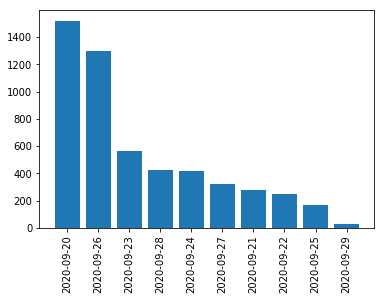

In [198]:
plt.bar(range(len(dates.value_counts())), list(dates.value_counts()), align='center')
plt.xticks(range(len(dates.value_counts())), list(key for key in date_freq.keys()),rotation='vertical')
plt.show()

In [222]:
#----------------Top 5 retweets-------------------------------------------------
retweet_freq = analysis_dataframe.nlargest(10, ['retweet_count']) 
print('Top retweeted tweet\n')
print('Tweet:',retweet_freq.tweet.values[0],'\n\nCount:',retweet_freq.retweet_count.values[0])

Top retweeted tweet

Tweet: b'RT @iVeenaKhan: Unemployment, drugs, and water-related issues have forced  Sikh farmers to commit suicide. Every Indian citizen must stand\xe2\x80\xa6' 

Count: 496


In [157]:
favorite_freq = analysis_dataframe.nlargest(10, ['favourite_count']) 
print('Top favourited tweet\n')
print('Tweet:',favorite_freq.tweet.values[0],'\n\nCount:',favorite_freq.favourite_count.values[0])

Top favourited tweet

Tweet: b'Petition in Delhi High Court against @Twitter whose "servers were used for the promotion of #Khalistan". Some serio\xe2\x80\xa6 https://t.co/kcXCsK6wAv' 

Count: 419


In [212]:
hashtag_list = pd.read_csv('../Anti-National-Tweets-Classification/dataset/combined_dataset/data_main.csv')
hashtag_list = hashtag_list[hashtag_list['label'] == 1]
hashtag_list = hashtag_list.hashtags
hashtag_list = hashtag_list.value_counts().keys()


def get_hashtags(hashtag_list):
    hashtags = []
    for i in hashtag_list:
        j = i.replace('[','')
        j = j.replace(']','')
        j = j.replace("''","")
        j = j.replace(' ','')
        j = j.split(',')
        for k in j:
            k = k.replace("'","")
            hashtags.append(k)
            
    return hashtags

hashtags = get_hashtags(hashtag_list)

freq_hashtags = pd.Series(Counter(hashtags)).sort_values(ascending=False)
print('Top 25 related hashtags\n')
print(freq_hashtags.head(25))

Top 25 related hashtags

Khalistan                  301
SFJ                        227
PunjabFarmers              116
GheraoModi                  81
Modi                        77
khalistan                   66
Referendum2020              50
BharatBandh                 41
Pannun                      35
Punjab                      34
KhalistanReferendum2020     32
ModiAtUN                    30
TerryFox                    30
Register2Vote2020           26
Pakistan                    26
Sikh                        24
modi                        24
MODIAtUN                    22
BaharatBandh                19
Sikhs                       19
Indian                      18
Canada4Khalistan            18
India                       17
SikhCommunity               17
TruckRally                  17
dtype: int64


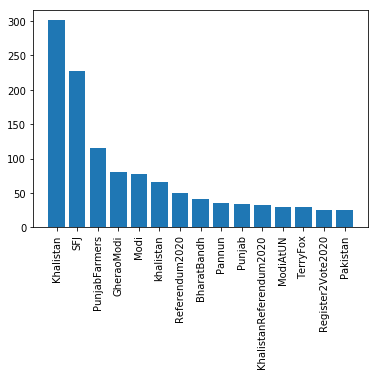

In [220]:
plt.bar(range(len(freq_hashtags.head(15))), list(freq_hashtags.head(15)), align='center')
plt.xticks(range(len(freq_hashtags.head(15))), list(key for key in freq_hashtags.head(15).keys()),rotation='vertical')
plt.show()